# Demonstration of the use of the rootzone model to convert Precipitation
and Makkink evaporation into a recharge series.
Makkink is used as E0, no changes made.
All data are in mm/d.
The decline (throttling) of E with the decline of the relative storage
may also be regarded as a crop resduction in some sense. Given all
uncertainties, trying to be more sophisticated does not make much sense.

TO 2025-09-05

In [1]:
# --- imports

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import etc
from itertools import cycle
import root_zone.src.root_zone_model as rzm

## Get the meteo data

The meteo file is from DeBilt wheather station. It's a long data file from which a silection is made using a time span.

In [8]:
# --- Get the meteodata in a pd.DataFrame

meteo_csv = os.path.join(rzm.data_folder, "DeBilt.csv")
os.path.isfile(meteo_csv)
deBilt = pd.read_csv(meteo_csv, header=0, parse_dates=True, index_col=0)

# --- datespan for the simulation and presentation
datespan = (np.datetime64("2010-01-01"), np.datetime64("2020-01-01"))
deBilt_short = deBilt.loc[datespan[0]:datespan[1], :]


## Compute the recharge (leakage from the root zone) for the meteo data

The computation is done for 3 different ways of reducing the evapotranspiration from a root zone that is partially dried out.

We have three rootzone models:

1. Bin: the E is not reduced until the root zone reservoir is totally empty.
2. Earth: The E is reduced linearly, proportional to (S/Smax)
3. Lam: The E is reduced according to (S/Smax) ** lambda

Note that lam=0 yield the same values as Bin and lam=1 yields the same values as Earth. Any lam between 0 and 1 can be used. lam = 0.25 seems convenient in many circumstances as it reduces E mildly when S is not far below Smax and more serverely when S approaches zero, which seems natural.

Recharge according to method bin:
 RH      2.318013e+00
EV24    1.646044e+00
STO     6.844344e+01
IC      5.769505e-01
EA      8.472215e-01
RCH     8.801533e-01
BI      2.939675e-18
BR     -7.028171e-19
dtype: float64 

Recharge according to method earth:
 RH      2.318013e+00
EV24    1.646044e+00
STO     8.116773e+01
IC      5.769505e-01
EA      6.871434e-01
RCH     1.040231e+00
BI      2.939675e-18
BR     -1.309709e-18
dtype: float64 

Recharge according to method lambda:
 RH      2.318013e+00
EV24    1.646044e+00
STO     7.253724e+01
IC      5.769505e-01
EA      7.989151e-01
RCH     9.284597e-01
BI      2.939675e-18
BR     -4.824744e-19
dtype: float64 



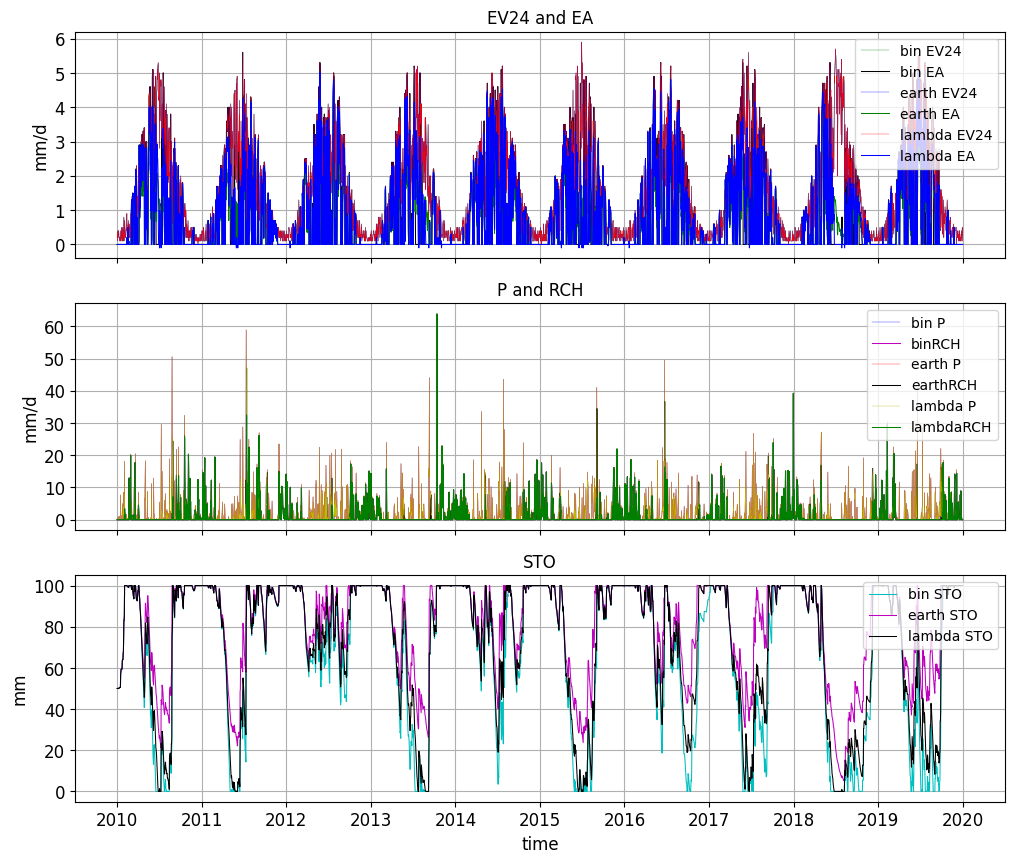

In [9]:

# --- set capacity of interception and root zone storage
Smax_I, Smax_R = 1.5, 100 # mm


clrs = cycle('rbgkmcy')

title = "Recharge computed by different methods"

labels = ['Makkink', 'bin', 'earth', 'lambda'][1:]
rchClasses = [rzm.RchMak, rzm.RchBin, rzm.RchEarth, rzm.RchLam][1:]

idx = deBilt_short.index

if True:
    ax1, ax2, ax3 = etc.newfigs(('EV24 and EA', 'P and RCH', 'STO'),
            'time', ('mm/d', 'mm/d', 'mm' ), figsize=(12, 10))

    lam = 0.25
    
    for rchClass, label in zip(rchClasses, labels):
        rch_simulator = rchClass(Smax_I=Smax_I, Smax_R=Smax_R, lam=lam)
        rch = rch_simulator.simulate(deBilt_short)
        
        clr = next(clrs)
        ax2.plot(rch.index, rch['RH'], '-',  lw=0.25, color=next(clrs),  label=label + ' P')
        ax1.plot(rch.index, rch['EV24'], '-',lw=0.25, color=next(clrs),  label=label + ' EV24')
        ax1.plot(rch.index, rch['EA' ], '-', lw=0.75, color=next(clrs),  label=label + ' EA')
        ax2.plot(rch.index, rch['RCH'], '-', lw=0.75, color=next(clrs),  label=label + 'RCH')
        ax3.plot(rch.index, rch['STO'], '-', lw=0.75, color=next(clrs),  label=label + ' STO')        
        print(f'Recharge according to method {label}:\n', rch.loc[idx].mean(), '\n')

    for ax in [ax1, ax2, ax3]:
        ax.legend(loc='upper right')    
    
    # fig.savefig(os.path.join(dirs.images, f'rch_{stn}.png'))

    plt.show()
